In [1]:
import pandas as pd

# Load dataset (assumes the CSV is in your working directory)
df = pd.read_csv(r"C:\Users\ACER\Downloads\bank+marketing\bank\bank-full.csv", sep=';')


In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Encode the target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# One-hot encode categorical features
X = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
y = df['y']


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      7952
           1       0.46      0.48      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043

Confusion Matrix:
 [[7344  608]
 [ 563  528]]


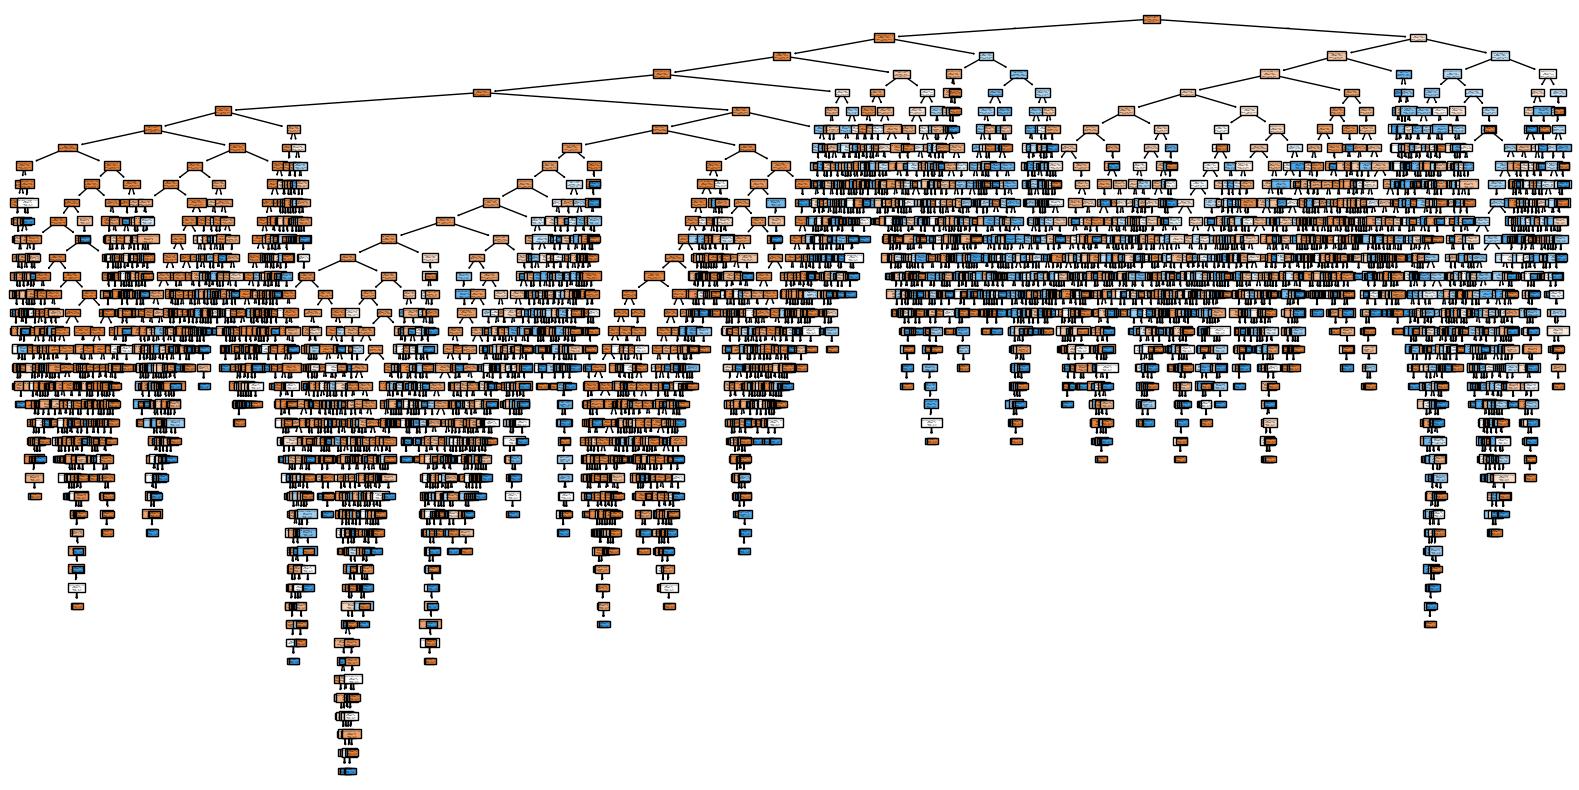

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


duration            0.272307
balance             0.107408
age                 0.097146
poutcome_success    0.091285
day                 0.088460
pdays               0.040217
campaign            0.033550
housing_yes         0.017793
previous            0.017745
month_jun           0.013682
dtype: float64


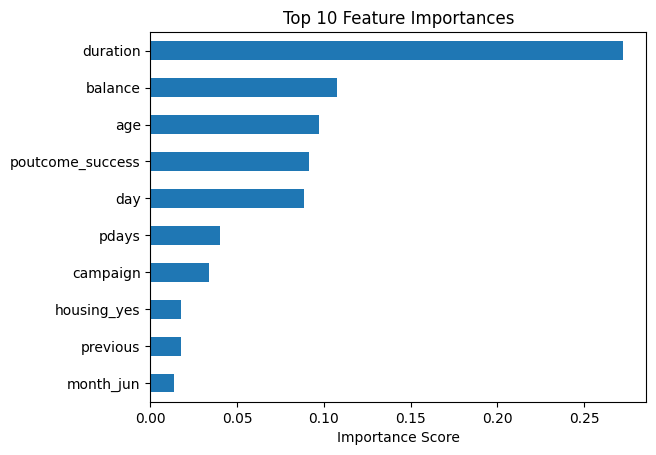

In [8]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)
print(top_features)

top_features.plot(kind='barh', title='Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()

In [12]:
import pickle

# After training
clf.fit(X_train, y_train)

# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Save training feature columns
with open('model_columns.pkl', 'wb') as f:
    pickle.dump(X_train.columns.tolist(), f)
